# Clasificación con SVM 

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features.
y = iris.target

In [3]:
# Vamos a crear un grid para poder plotearlo despues
# Tomamos los valores min y maximos de X e Y, y los ampliamos un poco

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# creamos un paso
h = (x_max / x_min)/100

# construimos el grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# Cargamos una matriz
X_plot = np.c_[xx.ravel(), yy.ravel()]

# vemos su shape
X_plot.shape

(34112, 2)

In [4]:
# Creamos un modelo SVM lineal 
# C: SVM regularization parameter

svc_lineal = svm.SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
svc_lineal.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

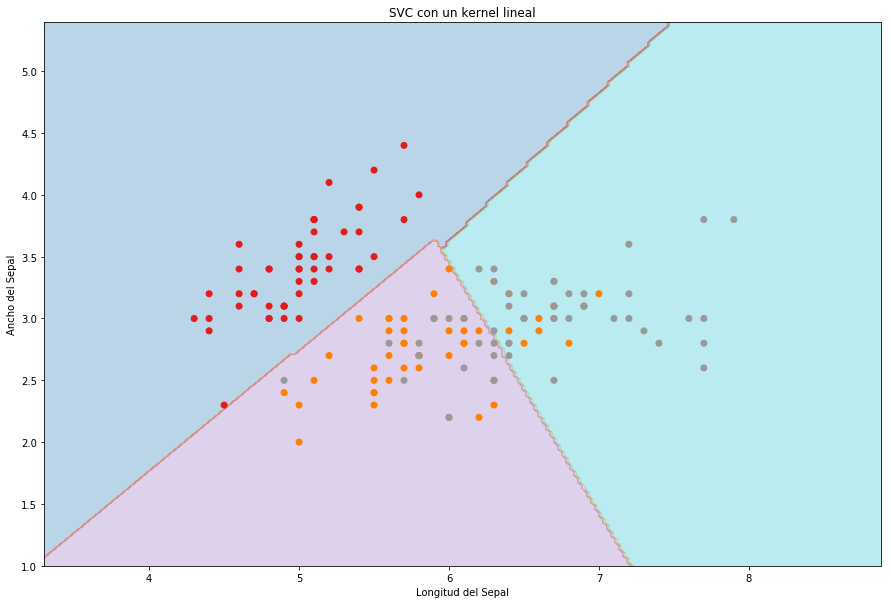

In [5]:
Z1 = svc_lineal.predict(X_plot)
Z1 = Z1.reshape(xx.shape)

plt.figure(figsize=(15, 10))
plt.contourf(xx, yy, Z1, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Longitud del Sepal')
plt.ylabel('Ancho del Sepal')
plt.xlim(xx.min(), xx.max())
plt.title('SVC con un kernel lineal')
plt.show()

In [6]:
# Creamos un modelo con kernel 'rbf'
svc_rbf = svm.SVC(kernel='rbf', C=1.0, decision_function_shape='ovr')
svc_rbf.fit(X, y)

Z2 = svc_rbf.predict(X_plot)
Z2 = Z2.reshape(xx.shape)


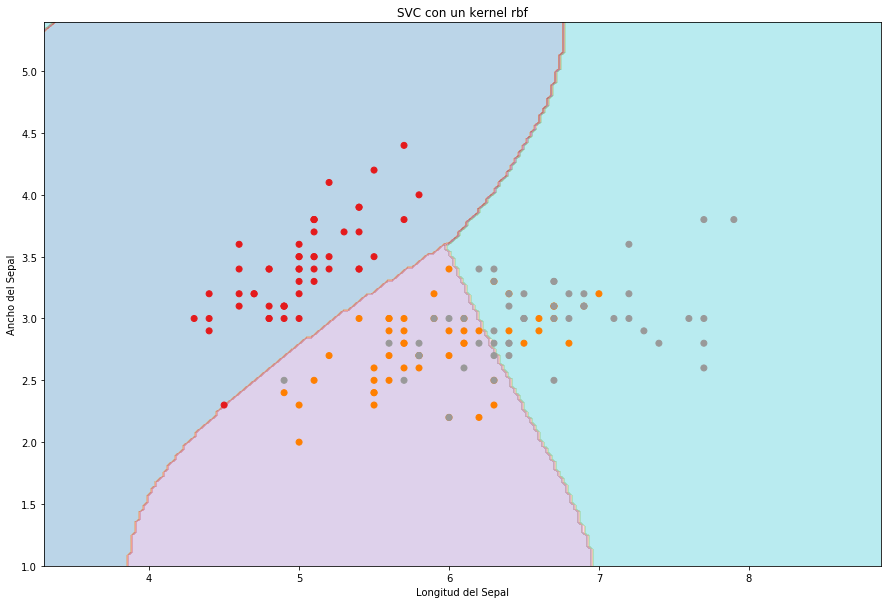

In [7]:
plt.figure(figsize=(15, 10))
plt.contourf(xx, yy, Z2, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)

plt.xlabel('Longitud del Sepal')
plt.ylabel('Ancho del Sepal')
plt.xlim(xx.min(), xx.max())
plt.title('SVC con un kernel rbf')

plt.show()

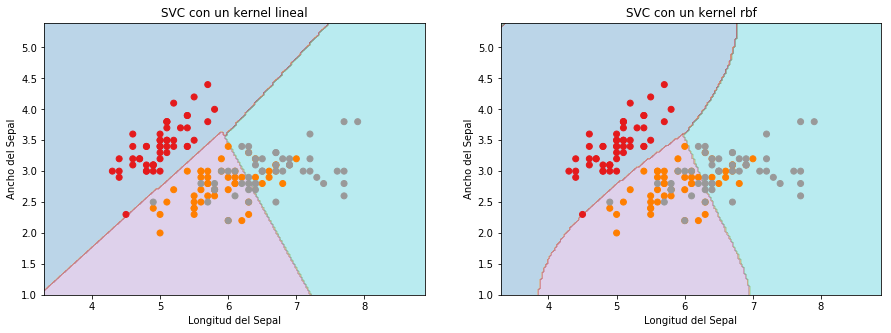

In [8]:
# Para comparar los resultados uno al lado del otro
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z1, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Longitud del Sepal')
plt.ylabel('Ancho del Sepal')
plt.xlim(xx.min(), xx.max())
plt.title('SVC con un kernel lineal')

plt.subplot(122)
plt.contourf(xx, yy, Z2, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)

plt.xlabel('Longitud del Sepal')
plt.ylabel('Ancho del Sepal')
plt.xlim(xx.min(), xx.max())
plt.title('SVC con un kernel rbf')

plt.show()